In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi 

Wed Mar  9 23:24:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import keras
import pathlib
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [ ]:





#cuidado






# current folder path
current_folder = os.getcwd() 

# list of folders to be merged
list_dir = ['Folder 1', 'Folder 2', 'Folder 3']

# enumerate on list_dir to get the 
# content of all the folders ans store it in a dictionary
content_list = {}
for index, val in enumerate(list_dir):
    path = os.path.join(current_folder, val)
    content_list[ list_dir[index] ] = os.listdir(path)

FileNotFoundError: ignored

In [ ]:
batch_size = 32
# train_ds = tf.keras.utils.image_dataset_from_directory(
#   dirADI,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(28, 28),
#   batch_size=batch_size)
# Data generators
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
from PIL import Image                                              
import os, sys                       

  
def resize(path,output):
    for item in dirs:
        # print(path+item)
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((224,224), Image.ANTIALIAS)
            print(item)
            a, b = item.split('.',1)
            # if(e == '.png'):
            imResize.save(output+a+'.png', 'png', quality=80)
            # elif(e == '.jpeg'):
            #     imResize.save(output+'.jpeg', 'jpeg', quality=80)
            # else:
            #     imResize.save(output+'.jpg', 'jpg', quality=80)


In [ ]:
##############################################################################
##############################################################################
##############################################################################
#NO EJECUTAR#
##############################################################################
##############################################################################
##############################################################################

output = '/content/drive/MyDrive/AIAA/test_covid/'
# validDir = '/content/drive/MyDrive/AIAA/CRC-VAL-HE-7K'
dirBacterial = '/content/drive/MyDrive/AIAA/covid-chest-xra/etiquetadas/Bacterial/'
dirOutBacterial = '/content/drive/MyDrive/AIAA/test_covi/Bacterial/'
dirs = os.listdir( dirBacterial )
resize(dirBacterial, dirOutBacterial)
dirCovid = '/content/drive/MyDrive/AIAA/covid-chest-xra/etiquetadas/COVID-19/'
dirOutBacterial = '/content/drive/MyDrive/AIAA/test_covi/COVID-19/'
dirs = os.listdir( dirCovid )
resize(dirCovid,dirOutBacterial)
dirNormal = '/content/drive/MyDrive/AIAA/covid-chest-xra/etiquetadas/Normal/'
dirOutBacterial = '/content/drive/MyDrive/AIAA/test_covi/Normal/'
dirs = os.listdir( dirNormal )
resize(dirNormal,dirOutBacterial)

In [ ]:
trainDir = '/content/drive/MyDrive/AIAA/prueba_covid'
testDir = '/content/drive/MyDrive/AIAA/test_covid'

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        trainDir,
        # All images will be resized to 224x224
        target_size=(224, 224),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need binary labels
        class_mode='categorical')

valid_generator = train_datagen.flow_from_directory(
        # This is the target directory
        testDir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need binary labels
        class_mode='categorical')


Found 662 images belonging to 3 classes.
Found 151 images belonging to 3 classes.


In [ ]:
#No ejecutar
train, test = train_test_split(train_generator, test_size = 0.30, random_state = 100) 

In [ ]:




#Mostras imagenes PRUEBA
sub_class = os.listdir(dir)
fig = plt.figure(figsize=(10,5))
path = os.path.join(dir,sub_class[0])
for i in range(4):
    plt.subplot(240 + 1 + i)
    img = plt.imread(os.path.join(path,str(i)+'.tif'))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

path = os.path.join(src_path,sub_class[1])
for i in range(4,8):
    plt.subplot(240 + 1 + i)
    img = plt.imread(os.path.join(path,str(i)+'.jpg'))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

TypeError: ignored

In [ ]:
def create_model_simple_cnn():
  model = models.Sequential()
  model.add(layers.BatchNormalization(input_shape=(224, 224, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(9, activation='softmax'))
  return model

In [ ]:
def create_simple_pm():
    #modelo simple de pm
    #se usa la sigmoide pero puede utilizarse la función de activación relu
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.BatchNormalization(input_shape=(75, 75, 3)))
    model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3), name="Input_layer"))
    model.add(tf.keras.layers.Dense(50, activation='sigmoid', name="Hidden_layer"))
    model.add(tf.keras.layers.Dense(10, activation='softmax', name="Output_layer"))
    return model

In [ ]:
model = create_model_simple_cnn()
model.summary()
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
      #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
      loss='categorical_crossentropy',
      metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 401408)            0         
                                                                 
 dense (Dense)               (None, 32)                12845088  
                                                                 
 dense_1 (Dense)             (None, 9)                 2

In [ ]:
train_labels = ['ADI','BACK','DEB','LYM','MUC','MUS','NORM','STR','TUM']
historico = model.fit(train_generator, epochs=1, validation_freq=1)

  63/1309 [>.............................] - ETA: 3:30:56 - loss: 5.0998 - accuracy: 0.5853

In [ ]:
historico2 = model.fit(train_generator, epochs=2, validation_freq=1)

Epoch 1/2
 314/1298 [======>.......................] - ETA: 2:52:06 - loss: 0.8498 - accuracy: 0.7575

KeyboardInterrupt: ignored

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
# load model without classifier layers
model = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
model.trainable = False
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(32, activation='relu')(flat1)
output = Dense(3, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
      #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
      loss='categorical_crossentropy',
      metrics=['accuracy'])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
historico2 = model.fit(train_generator, epochs=10, validation_freq=1)

Epoch 1/10
21/21 [==============================] - 23s 769ms/step - loss: 0.6264 - accuracy: 0.8293
Epoch 2/10
21/21 [==============================] - 16s 696ms/step - loss: 0.2599 - accuracy: 0.9184
Epoch 3/10
21/21 [==============================] - 12s 573ms/step - loss: 0.2241 - accuracy: 0.9215
Epoch 4/10
21/21 [==============================] - 12s 575ms/step - loss: 0.2026 - accuracy: 0.9275
Epoch 5/10
21/21 [==============================] - 12s 574ms/step - loss: 0.2010 - accuracy: 0.9275
Epoch 6/10
21/21 [==============================] - 13s 604ms/step - loss: 0.2004 - accuracy: 0.9260
Epoch 7/10
21/21 [==============================] - 12s 574ms/step - loss: 0.1879 - accuracy: 0.9260
Epoch 8/10
21/21 [==============================] - 12s 574ms/step - loss: 0.1501 - accuracy: 0.9486
Epoch 9/10
21/21 [==============================] - 13s 579ms/step - loss: 0.1544 - accuracy: 0.9441
Epoch 10/10
21/21 [==============================] - 12s 573ms/step - loss: 0.1153 - accura

In [ ]:
vgg16_pred = historico2.predict(test_datagen, batch_size=32, verbose=1)


AttributeError: ignored

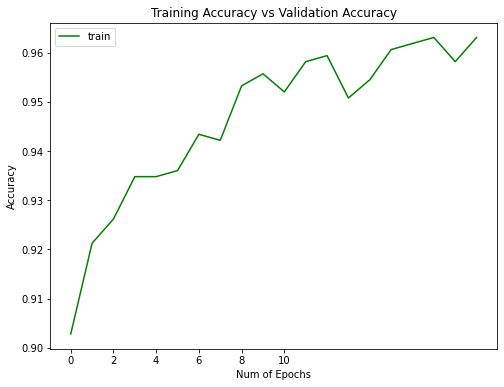

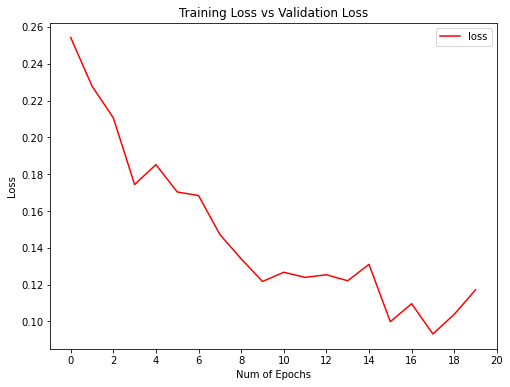

In [ ]:
plt.figure(0)  
# plt.plot(historico2.history['loss'],'r')  
plt.plot(historico2.history['accuracy'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(historico2.history['loss'],'r')  
# plt.plot(historico2.history['val_loss'],'g')  
plt.xticks(np.arange(0, 21, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['loss'])

plt.show()  

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

NameError: ignored

<Figure size 720x720 with 0 Axes>